In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set_palette("hls")

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('3조_빵집특성_4점척도(10.31).xlsx')
df.head()
del df['bakeryname']

In [3]:
df.shape

(27, 9)

In [4]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
scaled_df = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns) # scaled된 데이터

In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram

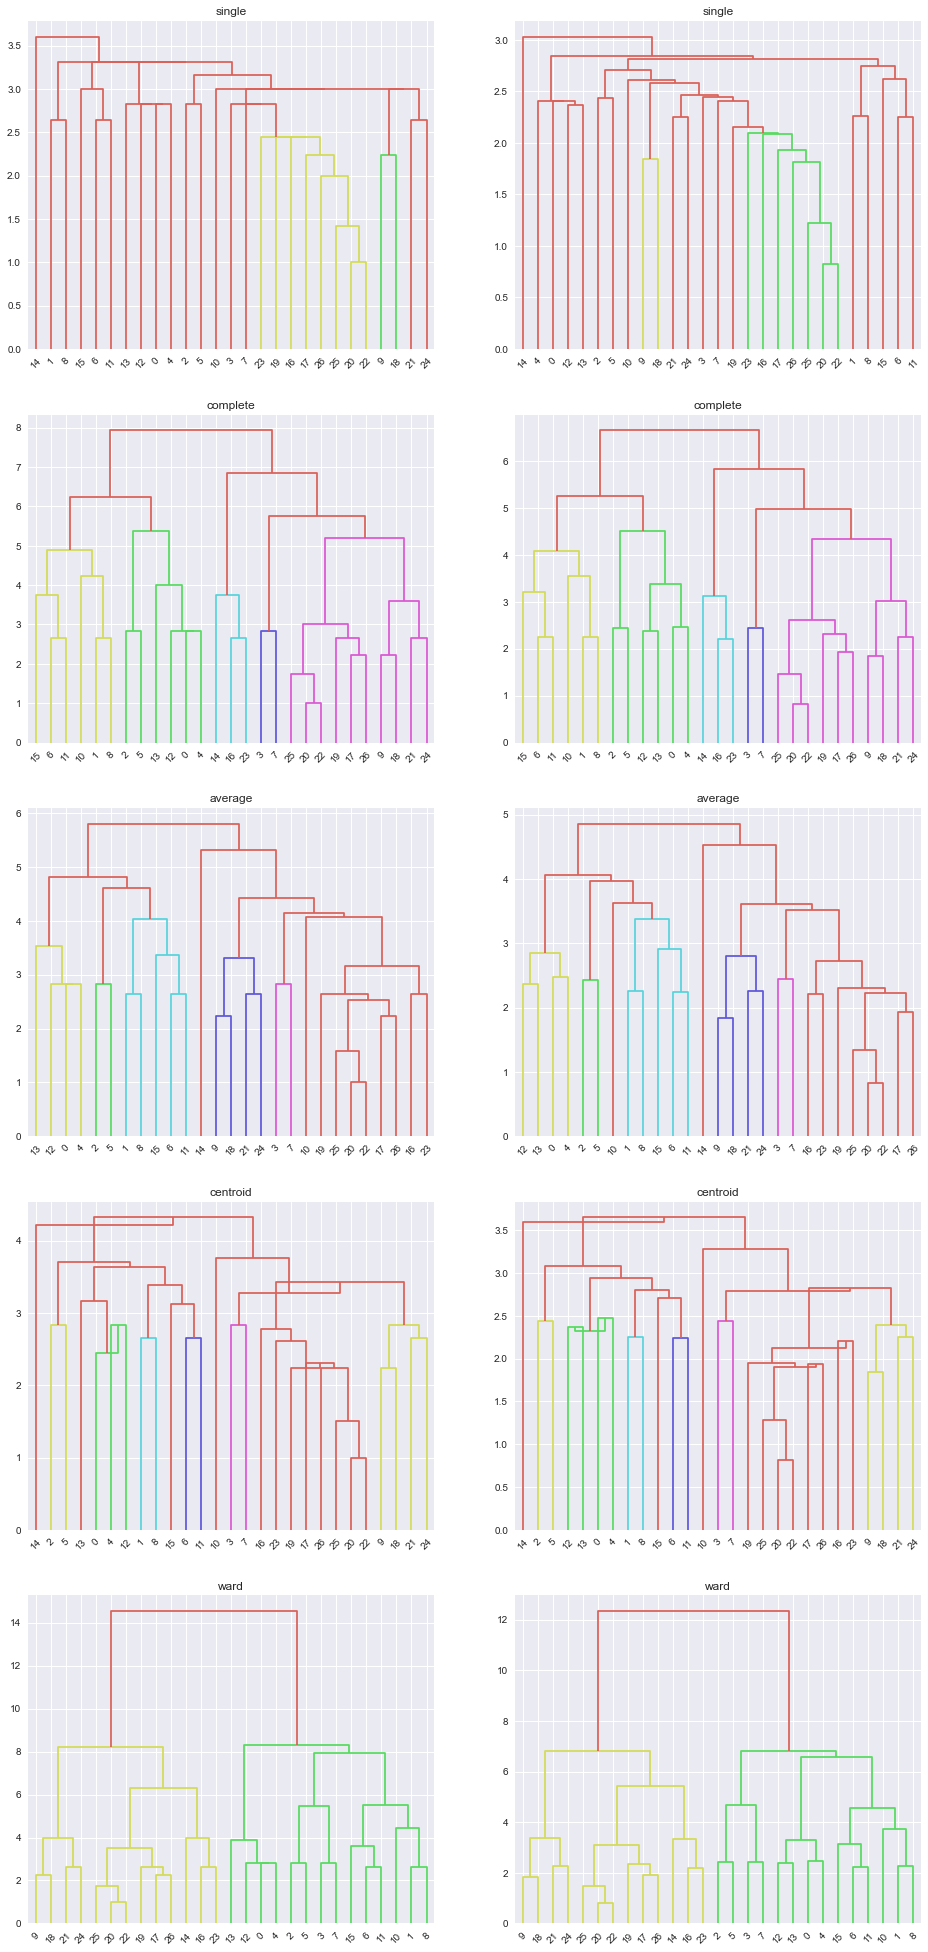

In [6]:
linkage_list = ['single', 'complete', 'average', 'centroid', 'ward']
data = [df,scaled_df]

fig, axes = plt.subplots(nrows=len(linkage_list), ncols=2, figsize=(16, 35))
for i in range(len(linkage_list)):
    for j in range(len(data)):
        hierarchical_single = linkage(data[j], method=linkage_list[i])
        dn = dendrogram(hierarchical_single, ax=axes[i][j])
        axes[i][j].title.set_text(linkage_list[i])
plt.show()

In [7]:
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=6, linkage='complete')
labels = agg_clustering.fit_predict(df)

In [8]:
from sklearn.cluster import KMeans

In [9]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(df)

KMeans(n_clusters=6)

In [10]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

In [60]:
bread = pd.read_excel("8조_빵집특성_4점척도(10.31).xlsx")
x = bread.iloc[:, 1:] 
x.head()

,pink_popular_f,red_special_f,orange_talk_f,yellow_costeff_f,green_gift_f,sky_eco_f,blue_cozy_f,purple_ease_f,grey_photo_f
0,4.0,4.0,4.0,3.0,1.0,1.0,4.0,4.0,4.0
1,4.0,4.0,4.0,4.0,1.0,4.0,4.0,4.0,4.0
2,4.0,3.0,1.0,4.0,3.0,1.0,2.0,2.0,1.0
3,4.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,4.0
4,4.0,2.0,4.0,3.0,3.0,1.0,3.0,3.0,3.0


In [65]:
km = KMeans(n_clusters=4) # 5개의 종류로 클러스터링 해라
km.fit(x)

cluster = km.predict(x)
cluster

array([3, 3, 1, 3, 3, 3, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2])

<AxesSubplot:>

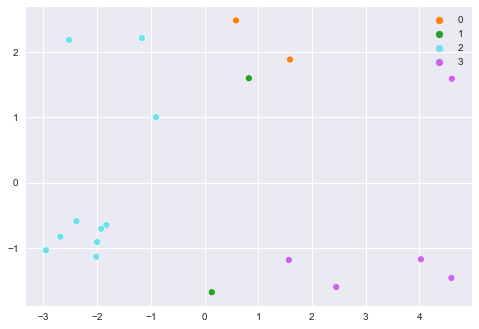

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 2차원으로 축소 
pca.fit(x)
pc = pca.transform(x)
5
import seaborn 
seaborn.scatterplot(x=pc[:, 0], y=pc[:, 1], hue=cluster,
                    palette=['#ff7f0e', '#2ca02c', '#6fe1ed', '#ca63f2'])